#Identitas Diri:
Nama  : Akmal Muzakki Bakir
>
NIM   : 1305210087
>
Kelas : DS-45-01

#Introducing To Scikit Learn And Clustering

In [1]:
import numpy as np #mengimpor library numpy, numpy menyediakan struktur data array yang efisien untuk menyimpan dan memanipulasi data numerik.
import scipy as sp #mengimpor library scipy, scipy menyediakan fungsi-fungsi integrasi, optimasi, transformasi fourier, pemrosesan sinyal dan statistik.
import scipy.sparse as sp_sparse #mengimpor modul sparse dari library scipy, digunakan untuk mengoperasikan matriks sparse, yaitu matriks dengan sebagian besar elemen bernilai nol.
import scipy.spatial.distance as sp_dist #mengimpor modul distance dari library scipy, untuk menghitung jarak titik antar vektor dalam ruang euclidean atau non-eculidean.

import matplotlib.pyplot as plt #mengimpor modul pyplot dari library matplotlib, digunakan untuk visualisasi grafikn dari data.

import sklearn as sk #mengimpor library scikit learn, menyediakan berbagai fungsi nmatematika, ilmu data, statistika, dan teknik numerasi seperti analisis data, pengolahaan sinyal, optimasi.
import sklearn.datasets as sk_data #mengimpor modul dataset dari library scikit learn, digunakan untuk mengakses dataset yang biasanya digunakan dalam machine learning dan data mining.
import sklearn.metrics as metrics #mengimpor modul metrics dari library scikitlearn, digunakan untuk melakukan evaluasi performnasi dari model.
from sklearn import preprocessing #mengimpor modul preprocessing dari library sklearn, digunakan untuk melakukan preprocessing pada dataset.
import sklearn.cluster as sk_cluster #mengimpor modul cluster dari library scikitlearn, untuk menggunakan algortitman cluster.
import sklearn.feature_extraction.text as sk_text #mengimpor modul text feature extraction dari library scikit learn, memproses teks dalam bentuk strring dan mengubh dalam vektor numerik.


import scipy.cluster.hierarchy as hr #mengimpor modul hierarchical cluster dari library scikit learn, menyediakan beberapa algoritma hierarchical clustering.

import time #mengimpor waktu.
import seaborn as sns # mengimpor library seaborn, untuk visualisasi.


#magic command untuk library matplotlib, menampilkan output grafik secara langsung di notebook.
%matplotlib inline 

##Computing Distances

In [2]:
x = np.random.randint(2, size = 5) #memunculkan angka random bertipe integer dalam array dengan nilai antara 0 dan 1 sebnyak 5 kali.
y = np.random.randint(2, size = 5) #memunculkan angka random bertipe integer dalam array dengan nilai antara 0 dan 1 sebnyak 5 kali.

#menampilkan array x dan y
print (x)
print (y)

#menghitung array jarak antara x dan y menggunakan beberapa operator dalam modul distance library scipy
print (sp_dist.cosine(x,y))
print (sp_dist.euclidean(x,y))
print (sp_dist.jaccard(x,y))
print (sp_dist.hamming(x,y))

[0 0 0 0 0]
[1 1 1 1 1]
0
2.23606797749979
1.0
1.0


/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [3]:
A = np.random.randint(2, size = (5,3)) #membuat array dengan 5 baris dan 3 kolom dengan nilai yang diambil secara acak antara 0 dan 1

D = sp_dist.pdist(A, 'jaccard') #menghitung pairwise distance dengan parameternya adalah variabel a dan  metrik jarak

#memberi output matriks
print (A)
# memberikan endline untuk ditaruh kalimat
print('\n all row distances')

#memberikan output matriks
print (D)
#menghitung
print(sp_dist.squareform(D)) #mengembalikan nilai dalam bentuk 2D dengan format matriks persegi 

[[1 1 1]
 [0 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 1]]

 all row distances
[0.66666667 0.66666667 0.33333333 0.         1.         0.5
 0.66666667 0.5        0.66666667 0.33333333]
[[0.         0.66666667 0.66666667 0.33333333 0.        ]
 [0.66666667 0.         1.         0.5        0.66666667]
 [0.66666667 1.         0.         0.5        0.66666667]
 [0.33333333 0.5        0.5        0.         0.33333333]
 [0.         0.66666667 0.66666667 0.33333333 0.        ]]


In [7]:
x = x.reshape(1,5) #mengubah format menjadi bentuk matriks 1, 5
y = y.reshape(1,5) #mengubah format menjadi bentuk matriks 1, 5
sp_dist.cdist(x,y,'cosine') #menghitung jarak kosinus antara vektor x dan y

array([[nan]])

In [5]:
B = np.random.randint(2, size = (3,3)) #membuat array dengan 3 baris dan 3 kolom dengan nilai yang diambil secara acak antara 0 dan 1

#output matriks
print(A)
print(B)

#menghitung jarak jaccard antara matriks a dan matriks b
D = sp_dist.cdist(A,B,'jaccard')

#output matriks
print(D)

[[1 1 1]
 [0 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 0]
 [1 0 1]]
[[0.66666667 0.33333333 0.33333333]
 [0.         0.5        1.        ]
 [1.         1.         0.5       ]
 [0.5        0.66666667 0.66666667]
 [0.66666667 0.33333333 0.33333333]]


In [8]:
print(A) #outuput 
D2 = metrics.pairwise_distances(A,metric = 'jaccard') #menghitung jarak jaccard antara setiap baris
print('\n the matrix of row distances') #endline untuk memberikan output kalimat
print(D2) #outuput matriks

[[1 1 1]
 [0 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 1]]

 the matrix of row distances
[[0.         0.66666667 0.66666667 0.33333333 0.        ]
 [0.66666667 0.         1.         0.5        0.66666667]
 [0.66666667 1.         0.         0.5        0.66666667]
 [0.33333333 0.5        0.5        0.         0.33333333]
 [0.         0.66666667 0.66666667 0.33333333 0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [9]:
C = metrics.pairwise.cosine_similarity(A) #menghitung cosine similarity antara setiap pasang baris di matriks A

#output hasil
print('Cosine Similarity')
print(C)

Cosine Similarity
[[1.         0.57735027 0.57735027 0.81649658 1.        ]
 [0.57735027 1.         0.         0.70710678 0.57735027]
 [0.57735027 0.         1.         0.70710678 0.57735027]
 [0.81649658 0.70710678 0.70710678 1.         0.81649658]
 [1.         0.57735027 0.57735027 0.81649658 1.        ]]


In [10]:
#output matriksz
print(A)
print (B)

D3 = metrics.pairwise_distances(A,B,metric = 'jaccard') #menghitung metrik pairwise distance dengan metode jaccard

#output matriks
print('\n the matrix of distances between the rows of A and B')
print(D3)

[[1 1 1]
 [0 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 0]
 [1 0 1]]

 the matrix of distances between the rows of A and B
[[0.66666667 0.33333333 0.33333333]
 [0.         0.5        1.        ]
 [1.         1.         0.5       ]
 [0.5        0.66666667 0.66666667]
 [0.66666667 0.33333333 0.33333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
#inisialisasi array 7x3 menggunakan numpy 
d = np.array([[0, 0, 12],
              [0, 1, 1],
              [0, 5, 34],
              [1, 3, 12],
              [1, 2, 6],
              [2, 0, 23],
              [3, 4, 14],
              ])

s = sp_sparse.csr_matrix((d[:,2],(d[:,0],d[:,1])), shape=(4,6)) #membuat matriks sparse dalam format CSR dengan library scipy dengan menyertakan tuple yang menyatakan nilai dan koordinat elemen matriks sparse, lalu menyatakan ukuran matriks sparse yang ingin dibuat
D4 = metrics.pairwise.pairwise_distances(s,metric = 'euclidean') #mengembalikan metrics hasil pairwise distance menggunakan parameter matriks sparse tadi dan metode euclidean
print(s.toarray()) #mengembalikan matriks dengan ukuran matriks 2 dimensi 
print(D4) #output array dengan metode pairwise distance

[[12  1  0  0  0 34]
 [ 0  0  6 12  0  0]
 [23  0  0  0  0  0]
 [ 0  0  0  0 14  0]]
[[ 0.         38.48376281 35.74912586 38.69108424]
 [38.48376281  0.         26.62705391 19.39071943]
 [35.74912586 26.62705391  0.         26.92582404]
 [38.69108424 19.39071943 26.92582404  0.        ]]


In [ ]:
v = np.random.randint(2, size = 6) #membuat array berukuran 6 dengan membangkitkan nilai random antara 0 dan 1
v = v.reshape(1,6) #reshape array menjadi dua dimensi 
print(v) #output array 
metrics.pairwise.pairwise_distances(v,s,metric = 'euclidean') #mengembalikan metrics hasil pairwise distance dengan parameter matriks sparse dan matriks dua dimnesi dengan metode euclidean

[[0 0 0 0 1 1]]


array([[35.14256678, 13.49073756, 23.04343724, 13.03840481]])

##Clustering 

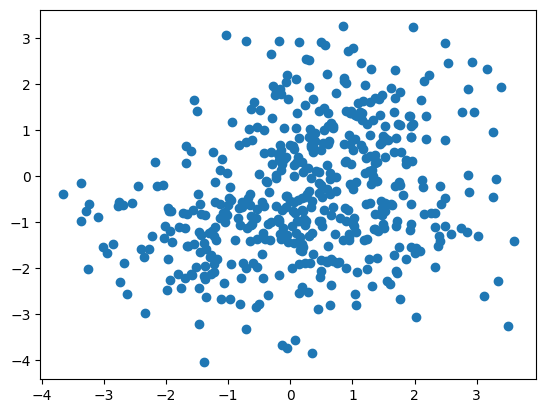

In [ ]:
centers = [[1,1], [-1, -1], [1, -1]]
X, true_labels = sk_data.make_blobs(n_samples=500, centers=centers, n_features=2,
                                    center_box=(-10.0, 10.0),random_state=0) #mengembalikan objek array dua dimensi yang berisi koordinat setiap titik berdasarkan titik-titik centernya 
plt.scatter(X[:,0], X[:,1]) #membuat grafik scatter

In [ ]:
print(type(X)) #outuput tipe variabel
print(true_labels) #output objek array dua dimensi berdasrakan titik centernya
print(len(true_labels[true_labels==0]),len(true_labels[true_labels==1]),len(true_labels[true_labels==2])) #output jumlah angka nol, satu, dua pada array

<class 'numpy.ndarray'>
[2 0 1 1 0 1 1 2 2 2 1 0 0 1 1 0 0 2 2 0 0 0 2 2 0 1 0 2 0 2 0 0 0 2 1 1 0
 0 2 2 0 2 1 0 2 2 0 0 1 2 2 0 0 1 0 2 1 1 1 2 2 1 0 0 2 1 1 2 2 2 2 1 2 0
 0 0 2 2 0 0 0 0 0 2 1 2 2 0 0 2 2 1 0 2 1 0 1 2 1 1 2 2 1 2 1 0 1 1 0 2 2
 2 0 2 0 2 2 0 1 1 0 1 2 1 1 2 2 1 2 0 0 0 1 2 2 0 2 0 2 1 2 1 0 0 1 0 2 1
 0 1 2 2 2 0 1 0 1 0 2 2 0 1 0 0 1 2 1 1 1 2 1 2 1 0 1 0 2 2 0 2 1 0 2 2 0
 1 2 0 0 2 1 2 2 2 0 2 2 1 2 1 0 2 1 2 1 2 0 0 0 1 2 0 0 2 1 1 2 2 0 1 2 0
 0 1 1 1 0 2 2 2 1 2 1 1 1 0 1 2 0 2 1 2 0 2 1 1 2 2 1 2 0 0 1 0 1 0 2 1 2
 1 1 1 1 0 0 1 0 1 1 1 1 2 1 0 0 0 0 2 1 2 2 0 0 1 0 2 1 0 2 2 1 0 0 1 0 2
 1 2 1 0 0 0 1 2 0 0 2 2 1 0 0 1 1 0 2 1 0 1 2 1 1 0 2 0 2 1 2 1 0 0 0 1 0
 2 2 1 0 2 2 2 0 1 1 1 0 1 0 0 0 2 0 2 0 2 2 0 2 2 2 2 1 1 1 2 2 2 2 0 0 0
 1 2 0 1 0 1 0 1 2 2 0 2 1 0 1 2 2 0 1 2 1 2 0 0 0 1 2 0 0 1 2 2 0 2 1 0 2
 0 1 0 2 0 0 1 0 0 0 0 1 0 2 2 2 1 0 1 2 1 2 1 0 1 1 1 1 1 0 2 1 2 0 0 1 2
 0 2 1 0 0 1 1 2 1 2 1 1 1 1 2 0 1 1 0 1 2 0 1 1 0 2 0 0 1 1 1 0 1 0 1 1 1
 

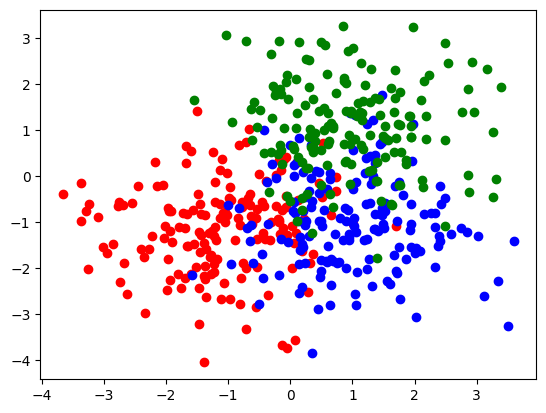

In [ ]:
plt.scatter(X[true_labels==1,0], X[true_labels==1,1],c = 'r') #indeks nilai pada kolom 1 dan 2 yang sama dengan 1 diwarnai merah dan diplot dalam scatter plot
plt.scatter(X[true_labels==2,0], X[true_labels==2,1],c = 'b') #indeks nilai pada kolom 1 dan 2 yang sama dengan 2 diwarnai biru dan diplot dalam scatter plot
plt.scatter(X[true_labels==0,0], X[true_labels==0,1],c = 'g')#indeks nilai pada kolom 1 dan 2 yang sama dengan 0 diwarnai hijau dan diplot dalam scatter plot

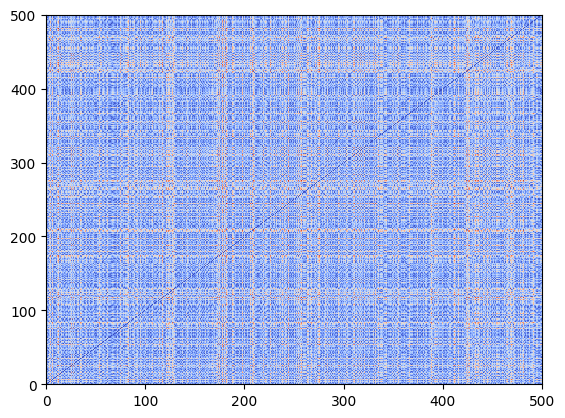

In [ ]:
euclidean_dists = metrics.euclidean_distances(X) #menghitung jarak Euclidean antara setiap pasang titik pada dataset X
plt.pcolormesh(euclidean_dists,cmap=plt.cm.coolwarm) #menghasilkan plot dengan menggunakan warna yang berbeda-beda untuk menunjukkan jarak antara setiap pasang titik pada dataset X

##Clustering Algorithm

###K-Means Clustering

In [ ]:
kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, n_init=10) #inisialisasi k-means dengan perubahan centroid sebanyak 10 kali yang terbagi dalam tiga cluster
kmeans.fit_predict(X) #prediksi label 
centroids = kmeans.cluster_centers_ #menyimpan pusat cluster (centroid)
kmeans_labels = kmeans.labels_ #menyimpan label cluster 
error = kmeans.inertia_ #menghitung jumlah error dalam pengelompokan inersia

#output total error, label dan lokasi centroid dari model 
print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  729.3882206069675

Cluster labels
[2 2 2 1 0 1 1 2 2 2 1 0 0 1 1 0 0 0 1 2 0 0 2 0 0 1 0 1 0 2 2 0 0 2 1 1 0
 0 2 2 0 2 1 0 2 2 0 0 2 2 1 0 0 1 0 0 1 1 0 0 2 1 0 0 0 1 1 1 2 2 0 1 2 0
 2 0 1 2 0 0 0 0 0 2 1 2 0 0 0 2 1 1 0 2 2 2 1 2 0 1 0 2 2 2 1 0 1 1 0 2 2
 2 0 2 2 2 2 0 1 1 0 1 2 1 1 2 2 1 2 0 0 0 1 2 2 0 2 0 2 2 2 1 2 2 1 0 2 2
 0 1 0 2 2 0 1 0 1 2 0 2 0 2 2 0 1 2 1 1 1 2 2 2 1 0 1 0 1 2 0 2 1 0 0 2 0
 1 2 0 0 0 1 2 2 2 0 2 2 1 2 1 0 2 1 2 1 2 0 0 0 1 2 0 0 1 0 1 2 2 0 1 2 0
 0 1 1 0 0 2 0 2 1 2 1 0 1 0 1 0 0 0 1 2 0 2 1 2 2 0 1 2 0 2 1 0 1 0 2 1 2
 1 1 1 2 0 0 0 0 1 1 0 1 2 1 0 0 0 0 2 1 2 2 0 0 1 0 2 1 0 1 2 1 2 0 1 0 0
 1 2 1 0 0 0 1 2 0 0 0 2 1 2 0 1 1 0 2 1 0 1 0 2 1 0 2 0 2 1 0 2 0 0 0 1 0
 0 2 1 2 2 2 2 0 1 1 1 2 0 0 0 0 2 0 1 2 2 1 0 0 2 1 1 1 2 1 0 2 2 2 0 0 0
 2 0 0 1 0 1 2 0 1 2 0 2 1 0 1 2 2 0 1 2 1 2 0 2 0 1 2 0 0 1 2 2 0 2 1 0 2
 2 1 1 0 0 0 1 0 0 0 0 2 0 0 2 2 1 0 2 2 2 2 1 0 1 1 2 1 1 0 1 1 2 0 0 1 2
 0 2 1 0 2 2 1 2 1 2 1 1 1 

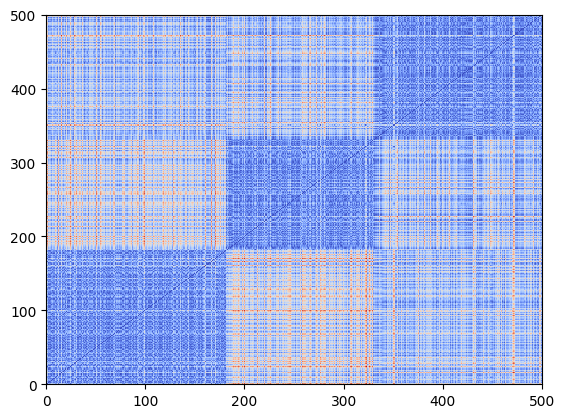

In [ ]:
idx = np.argsort(kmeans_labels) # mengurutkan indeks dataset
rX = X[idx,:] #membuat dataset X yang telah diurut
r_euclid = metrics.euclidean_distances(rX) #menghitung jarak Euclidean antara setiap pasang titik pada dataset rX yang telah diurutkan

plt.pcolormesh(r_euclid,cmap=plt.cm.coolwarm) #menghasilkan plot dengan menggunakan warna yang berbeda-beda 

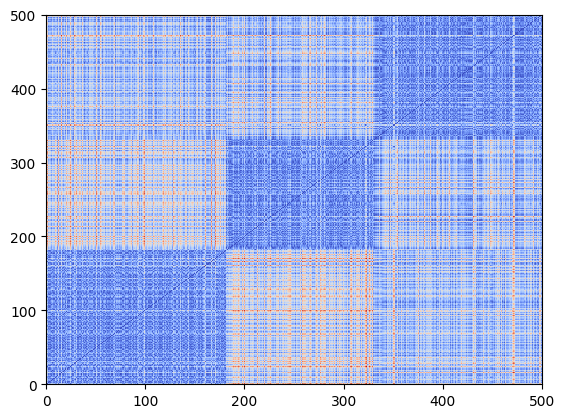

In [ ]:
se = euclidean_dists[idx,:] #mengambil jarak euclidean antara setiap pasang titik dan mengurutkannya berdasarkan label klaster yang dihasilkan 
se = se[:,idx] #mengambil bagian dari array se tadi
plt.pcolormesh(se,cmap=plt.cm.coolwarm) #menghasilkan plot dengan menggunakan warna yang berbeda-beda

[[140  12  29]
 [  1 135  15]
 [ 26  20 122]]


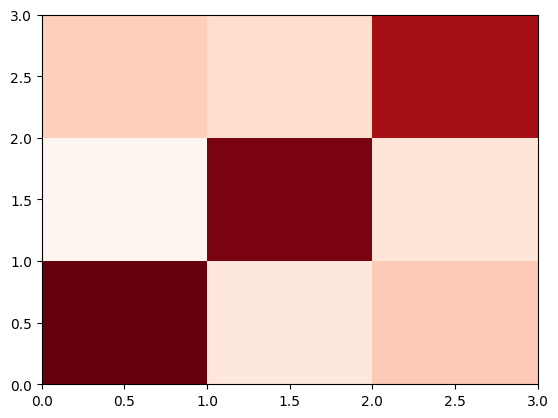

In [ ]:
C= metrics.confusion_matrix(kmeans_labels,true_labels) #membuat confussion matrix berdasarkan kmeans_labels dan true_labels
print (C) #output confussion matrix
plt.pcolormesh(C,cmap=plt.cm.Reds) #menghasilkan warna-warna yang berbeda pada confussion matrix

[[140  12  29]
 [  1 135  15]
 [ 26  20 122]]


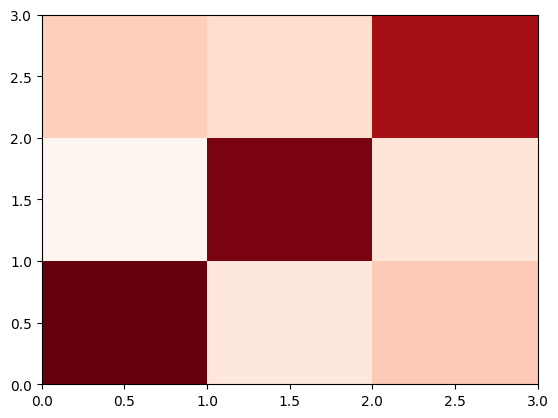

In [ ]:
#membuat fungsi untuk memetakan label cluster yang dihasilkan oleh k-means, menggunakan dua parameter yaitu label k-means, dan label sebenarnya
def cluster_class_mapping(kmeans_labels,true_labels):
    C= metrics.confusion_matrix(kmeans_labels,true_labels) #membuat confusion matrix untuk label 
    mapping = list(np.argmax(C,axis=1)) #mencari cluster dengan label terbaik pada confussion matrix
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

mapped_kmeans_labels,C = cluster_class_mapping(kmeans_labels,true_labels)
print(C)
plt.pcolormesh(C, cmap=plt.cm.Reds)

In [ ]:
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average=None) #menghitung hasil presisi secara terpisah
print(p) #output hasil presisi

r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = None) #mengitung recall score secara terpisah, recall score =  kemampuan model untuk mengidentifikasi atau menemukan seluruh contoh positif pada data
print(r) #output recall score

f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = None) #menghitung f1 score secara terpisah, f1 score = gabungan antara precision dan recall score
print(f) #output f1 score

p = metrics.precision_score(true_labels,mapped_kmeans_labels, average='weighted') #menghitung nilai presisi dengan memperhatikan bobot masing-masing kelas
print(p) #output nilai presisi

r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = 'weighted') #menghitung nilai recall dengan memperhatikan bobot masing-masing kelas
print(r) #output nilai recall

f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = 'weighted') #menghitung nilai f1 dengan memperhatikan bobot masing-masing kelas
print(f) #output nilai f1

[0.77348066 0.89403974 0.72619048]
[0.83832335 0.80838323 0.73493976]
[0.8045977  0.8490566  0.73053892]
0.7980470510548809
0.794
0.794859459999974


In [ ]:
h = metrics.homogeneity_score(true_labels,mapped_kmeans_labels) #menghitung nilai keseragaman setiap cluster
print(h) #output nilai keseragaman 

c = metrics.completeness_score(true_labels,mapped_kmeans_labels) #mengukur kelengkapan setiap cluster
print(c) #nilai kelengkapan setiap cluster

v = metrics.v_measure_score(true_labels,mapped_kmeans_labels) #gabungan homogeneity dan completeness 
print(v) #output nilai measure 

0.44199547480098583
0.4430951461741084
0.44254462735008065


Text(0, 0.5, 'Error')

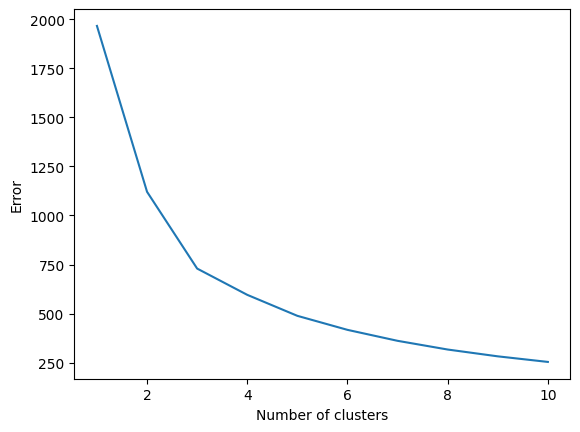

In [ ]:
error = np.zeros(11) #membuat array nilai nol dengan ukuran 11
sh_score = np.zeros(11) #membuat array nilai nol dengan ukuran 11

#looping untuk setiap jumlah cluster yang akan digunakan, yaitu dari 1 hingga 10.
for k in range(1,11):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10) #inisialisasi model k-means
    kmeans.fit_predict(X) #melakukan clustering
    error[k] = kmeans.inertia_ #menyimpan nilai error yang dihasilkan
    if k>1: sh_score[k]= metrics.silhouette_score(X, kmeans.labels_) #evaluasi dengan metode silhoutte pada hasil cluster

#plotting 
plt.plot(range(1,len(error)),error[1:]) #membuat visualisasi error untuk setiap jumlah cluster yang dipakai
plt.xlabel('Number of clusters') #membuat judul sumbu x
plt.ylabel('Error') #membuat judul sumbu y

Text(0, 0.5, 'silhouette score')

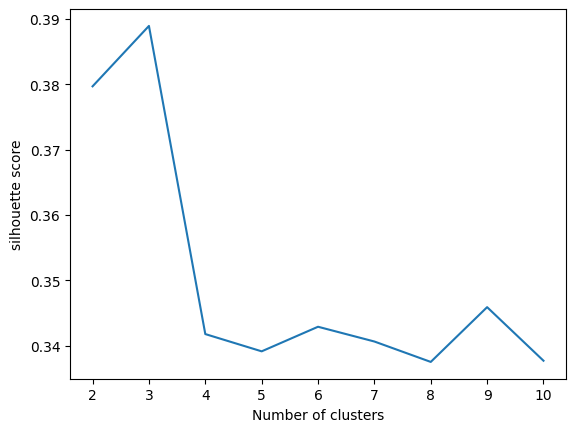

In [ ]:
#ploting nilai evaluase dengan metode silhouette
plt.plot(range(2,len(sh_score)),sh_score[2:])

#membuat judul sumbu x
plt.xlabel('Number of clusters')

#membuat judul sumbu y
plt.ylabel('silhouette score')

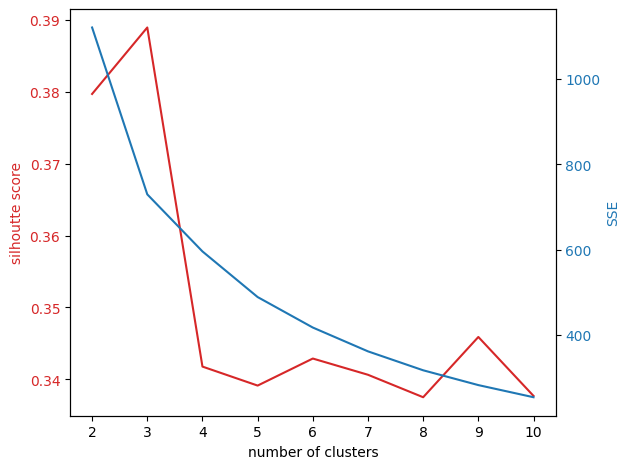

In [ ]:
fig, ax1 = plt.subplots() #membuat objek figure dan axis utama

color = 'tab:red' #inisialisasi warna 
ax1.set_xlabel('number of clusters') #membuat judul sumbu x
ax1.set_ylabel('silhoutte score', color=color) #membuat judul sumbu y dengan menambahkan warna yang sudah diinisialisasi
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color) #memperoleh nilai sumbu y dan menambahkan warna yang sudah diinisialisasi
ax1.tick_params(axis='y', labelcolor=color) #mengatur parameter tampilan pada sumbu y dan menambahkan warna pada label 

ax2 = ax1.twinx() #membuat objek axis kedua yang berbagi sumbu x dengan axis utama

color = 'tab:blue' #inisialisasi warna 
ax2.set_ylabel('SSE', color=color)  #membuat judul sumbu y dengan menambahkan warna yang sudah diinisialisasi
ax2.plot(range(2,len(error)),error[2:], color=color) #memperoleh nilai sumbu y dan menambahkan warna yang sudah diinisialisasi
ax2.tick_params(axis='y', labelcolor=color) #mengatur parameter tampilan pada sumbu y dan menambahkan warna pada label 

fig.tight_layout() #membuat label sumbu tidak saling menimpa, sehingga figure jadi lebih optimal

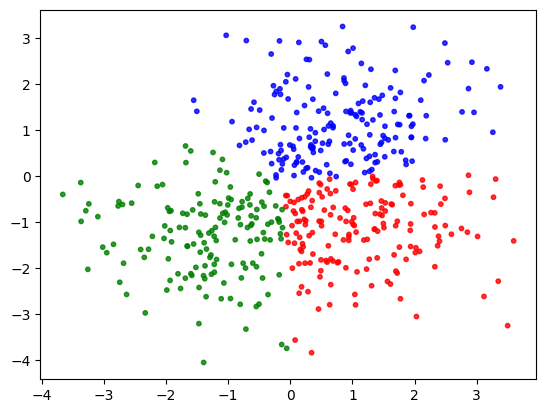

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk']) #inisialisasi warna untuk setiap cluster dalam array
colors = np.hstack([colors] * 20) #array warna diulang sebanyak 20 kali dengan menggunakan np.hstack
plt.scatter(X[:, 0], X[:, 1], color=colors[kmeans_labels].tolist(), s=10, alpha=0.8) #menghasilkan sebuah scatter plot dengan sumbu-x dan sumbu-y yang masing-masing mewakili atribut pertama dan kedua

### Agglomerative Clustering

[[ 33 156 108]
 [126  10  16]
 [  8   1  42]]
[[126  10  16]
 [ 33 156 108]
 [  8   1  42]]
0.7257145291928573
0.648


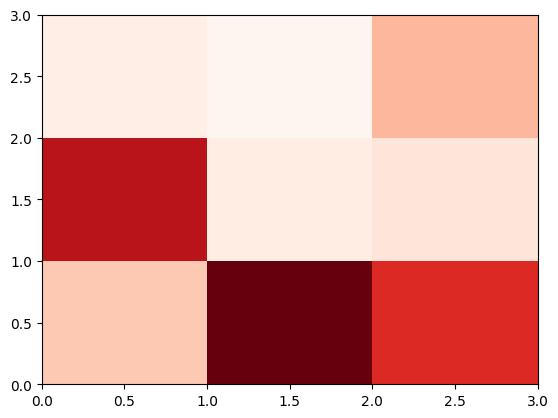

In [ ]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3) #inisialisasi model aggomerative dengan metode complete dan 3 cluster
agglo_labels = agglo.fit_predict(X) #prediksi clustering dengan menghasilkan label

C_agglo= metrics.confusion_matrix(agglo_labels,true_labels) #menghitung confussion matrix
print (C_agglo) #output nilai confussion matrix

plt.pcolormesh(C_agglo,cmap=plt.cm.Reds) #membuat plot heat map untuk confussion matrix

mapped_agglo_labels,C_agglo = cluster_class_mapping(agglo_labels,true_labels) #mapping label cluster dan menyimpan di variabel juga dihitung kembali confussion matrixnya
print(C_agglo) #output nilai confussion matrix

p = metrics.precision_score(true_labels,mapped_agglo_labels, average='weighted') #menghitung nilai presisi dengan mempertimbangkan bobot setiap kelas
print(p) #ouput nilai presisi

r = metrics.recall_score(true_labels,mapped_agglo_labels, average = 'weighted') #menghitung nilai recall dengan mempertimbangkan bobot setiap kelas
print(r) #output nilai recall

In [ ]:
Z = hr.linkage(X, method='complete', metric='euclidean') #inisialisasi hierarchical clustering dengan linkage complete, dan menghitung jarak dengan euclidean
print (Z.shape, X.shape) #output bentuk dimensi array 

(499, 4) (500, 2)


In [ ]:
D = sp_dist.pdist(X, 'euclidean') #menghitung pairwise distance menggunakan metrik euclidean
Z = hr.linkage(D, method='complete') #inisialisasi hierarchical clustering dengan metode linkage complete
print (Z.shape, X.shape) #output dimensi array 

(499, 4) (500, 2)


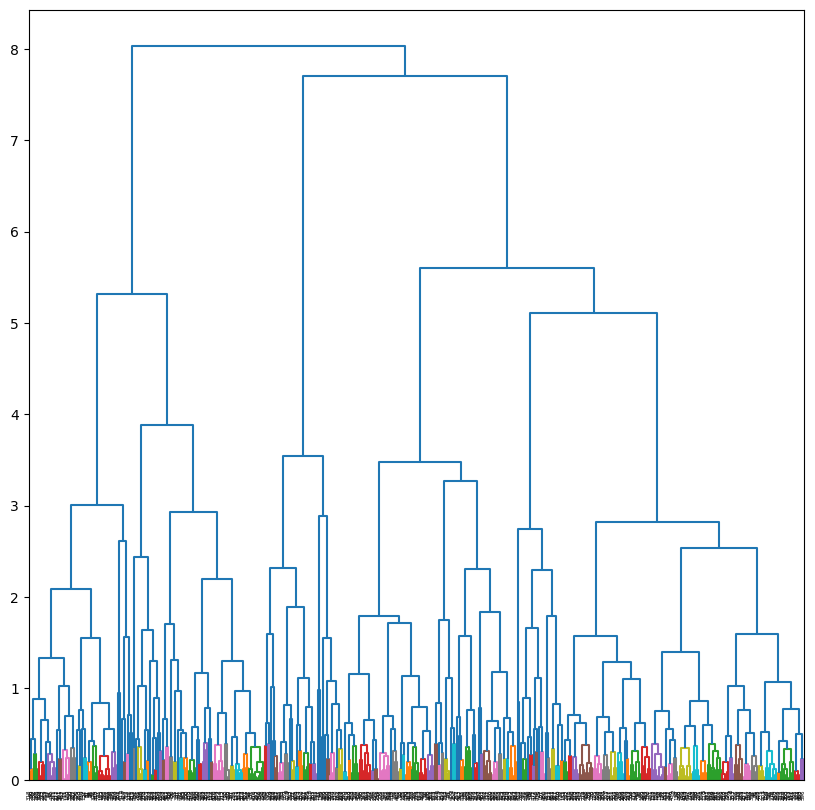

In [ ]:
fig = plt.figure(figsize=(10,10)) #inisialisasi ukuran figur dari plot
T = hr.dendrogram(Z,color_threshold=0.4, leaf_font_size=4) #membuat dendogram menggunakan model hierarchical clustering yang tadi
fig.show() #ouput plotting

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


[177, 469, 83, 179, 343, 61, 34, 124, 3, 466, 252, 490, 442, 312, 354, 230, 240, 476, 302, 57, 317, 154, 438, 167, 71, 472, 232, 399, 450, 35, 236, 454, 172, 478, 219, 107, 320, 455, 283, 434, 244, 426, 425, 121, 123, 25, 335, 432, 254, 6, 174, 127, 388, 423, 267, 53, 435, 257, 197, 209, 481, 415, 491, 264, 206, 294, 181, 411, 275, 12, 117, 208, 226, 187, 332, 444, 238, 274, 263, 310, 75, 355, 374, 4, 424, 465, 95, 114, 142, 309, 281, 129, 468, 471, 80, 250, 200, 266, 419, 235, 436, 383, 194, 462, 28, 160, 441, 301, 412, 40, 11, 173, 242, 380, 100, 350, 221, 330, 392, 410, 36, 499, 287, 394, 88, 31, 54, 43, 155, 182, 347, 20, 222, 295, 369, 32, 15, 188, 440, 326, 316, 447, 24, 82, 137, 92, 480, 168, 223, 431, 382, 484, 492, 52, 345, 363, 58, 300, 47, 78, 51, 387, 356, 145, 207, 346, 416, 62, 329, 37, 305, 98, 321, 153, 178, 247, 348, 306, 417, 112, 148, 163, 405, 367, 81, 255, 323, 304, 131, 313, 135, 218, 402, 120, 16, 482, 63, 205, 333, 474, 443, 231, 1, 403, 150, 108, 397, 45, 19, 3

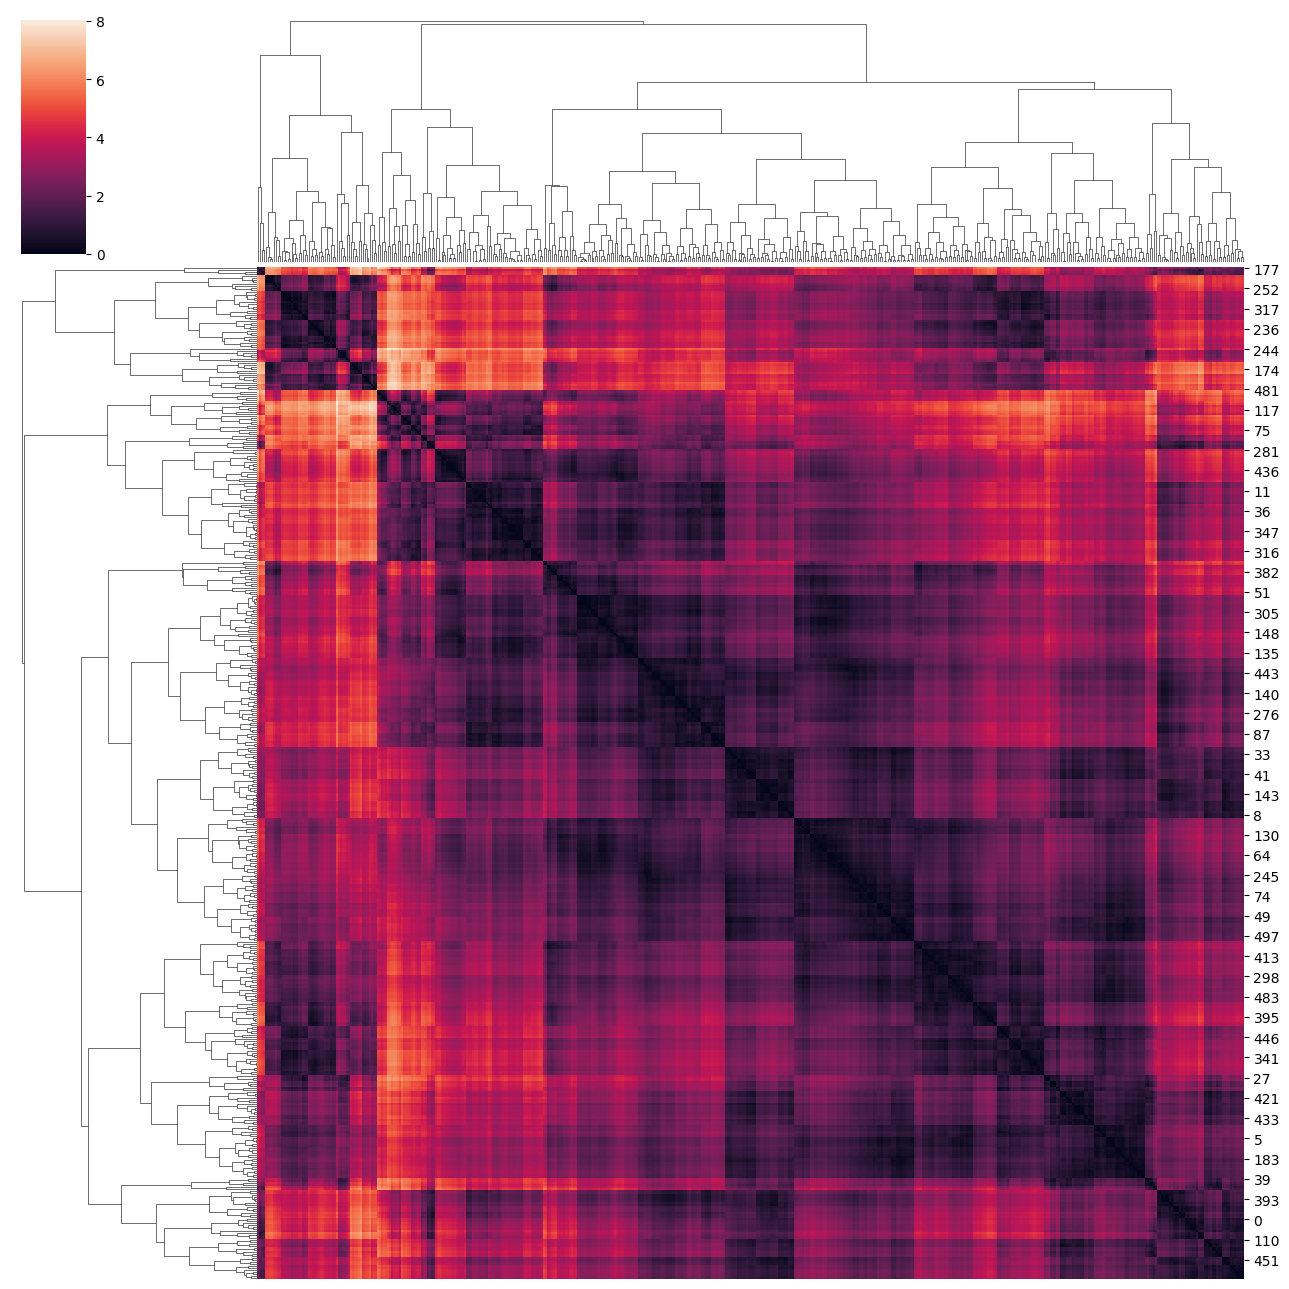

In [ ]:
distances = metrics.euclidean_distances(X) #menghitung jarak menggunakan euclidean 
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False) #membuat peta cluster dengan clustermap 
print (cg.dendrogram_col.reordered_ind) #ouput indeks data poin yang dibuat dalam clustermap 

###DBSCAN Algorithm

In [ ]:
dbscan = sk_cluster.DBSCAN(eps=0.3) #inisialisasi model dbscan
dbscan_labels = dbscan.fit_predict(X) #memproses cluster dengan melabelinya
print(dbscan_labels) #ouput cluster menggunakan dbscan

renamed_dbscan_labels = [x+1 for x in dbscan_labels] #mengatur label cluster agar dimulail ldari 1
C = metrics.confusion_matrix(renamed_dbscan_labels,true_labels) #menghitung confussion matrix 
print (C[:,:max(true_labels)+1]) #memastikan bahwa masing-masing kolom pada confusion matrix sesuai dengan masing-masing klaster pada label asli

[ 5  0  0 -1 -1  0 -1  0  0  3  0  0 -1 -1  0 -1  0  0  0  0  0  0  5  0
  0 -1  0 -1 -1  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0 -1  1 -1  0  0  0  0  1  0  0 -1  0  0  0  0  0  0  0  0  0 -1
  0  0  0 -1  0  0 -1  0  2  0  0 -1  0  3  0  0  0 -1  0  0 -1  0  0 -1
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0
  0 -1  0 -1 -1  3  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  4  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0 -1  1  0  0  0 -1
 -1  3  0 -1 -1  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1 -1  0 -1  0
  0  0  0  0  0 -1  0  0  2  0  0 -1  0  0 -1  0 -1 -1 -1  0  0  0  0 -1
  0 -1  0  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  2  0  0 -1  0
  0  5  0  0 -1  0  0  0  0  0  2  0 -1  0 -1  0 -1 -1  0  0  0  0  0 -1
 -1  0  2 -1  0  0  0  5  0  0 -1 -1  0  0  0  0 -1 -1  0  0  0 -1  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0 -1  0  0  0  0  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0

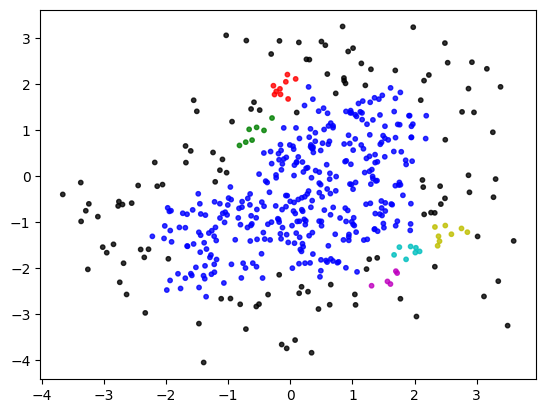

In [ ]:
colors = np.array([x for x in 'bgrcmywk'*10]) #inisialisasi warna yang digunakan pada cluster
plt.scatter(X[:, 0], X[:, 1], color=colors[dbscan_labels].tolist(), s=10, alpha=0.8) #membuat scatter plot pada model dbscan

##Clustering Text Data

In [ ]:
from sklearn.datasets import fetch_20newsgroups #mengimpor dataset dari 20 news groups

categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball'] #inisialisasi kategori

#menghapus header dan memuat dokumen yang termasuk di kategori yang sudah diinisialisasi hanya pada data training
news_data = sk_data.fetch_20newsgroups(subset='train', 
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (news_data.target) #output target label dari setiap dokumen dalam dataset.
print (len(news_data.target)) #ouput jumlah dokumen yang berhasil dimuat dari dataset

[2 0 0 ... 2 1 2]
1781


In [ ]:
print (type(news_data)) #ouput tipe data
print (news_data.filenames) #ouput path dokumen yang dicetak
print (news_data.target[:10]) #output 10 nilai target pertama (label kelas) dari dataset
print (news_data.data[1]) #ouput isi dari dokumen pada indeks ke-1 dari dataset
print (len(news_data.data)) #output jumlah total dokumen pada dataset

<class 'sklearn.utils._bunch.Bunch'>
['/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60940'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.os.ms-windows.misc/9955'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.os.ms-windows.misc/9846'
 ...
 '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60891'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/rec.sport.baseball/104484'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61110']
[2 0 0 2 0 0 1 2 2 1]
Recently the following problem has arrisen.  The first time I turn on my  
computer when windows starts (from my autoexec) after the win31 title screen  
the computer reboots on its own.  Usually the second time (after reboot) or  
from the DOS prompt everything works fine.

 s far as I remember I have not changed my config.sys or autoxec.bat or  
win.ini.  I can't remember whether this problem occured before I  
optimized/defragmented my disk a

In [ ]:
#inisialisasi pembangun vektor TF-IDF
vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data) #menggunakan vektor TDF-IDF tadi untuk model news data
print(type(data)) # ouput tipe data

<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
k=3 #inisialisasi jumlah cluster
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1) #inisialisasi model k-means
kmeans.fit_predict(data) #clustering dengan melabeli data

array([2, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
print("Top terms per cluster:") #ouput string
asc_order_centroids = kmeans.cluster_centers_.argsort() #inisialisasi array dengan indeks di mana kolom-kolomnya akan diurutkan dalam urutan ascending
order_centroids = asc_order_centroids[:,::-1] #mengurutkan indeks kolom dalam setiap cluster dalam urutan descending
terms = vectorizer.get_feature_names_out() #ambil data fitur

#looping untuk mencetak cluster secara rapih f=dan teratur
for i in range(k): #loop melalui setiap cluster
    print ("Cluster %d:" % i) #cetak nomer cluster
    for ind in order_centroids[i, :10]: # loop melalui top 10 indeks kolom dalam urutan descending untuk cluster saat ini
        print (' %s' % terms[ind]) #Cetak fitur yang sesuai dengan indeks
    print #cetak baris kosong untuk memberikan jarak

Top terms per cluster:
Cluster 0:
 windows
 file
 dos
 files
 thanks
 card
 drivers
 driver
 use
 problem
Cluster 1:
 year
 game
 team
 games
 runs
 hit
 think
 good
 pitching
 baseball
Cluster 2:
 space
 just
 like
 think
 nasa
 know
 don
 time
 people
 does


In [ ]:
C = metrics.confusion_matrix(kmeans.labels_,news_data.target) #menghitung confussion matrix

mapped_kmeans_labels,C = cluster_class_mapping(kmeans.labels_,news_data.target) #mapping untuk dihitung kembali confussion matrix
print (C) #ouput nilai confussion matrix

p = metrics.precision_score(news_data.target,mapped_kmeans_labels, average=None) #menghitung nilai presisi setiap cluster
print(p) #ouput nilai presisi

r = metrics.recall_score(news_data.target,mapped_kmeans_labels, average = None) #menghitung nilai recall setiap cluster
print(r) #output nilai recall

[[360   1   2]
 [  0 345   1]
 [231 251 590]]
[0.99173554 0.99710983 0.55037313]
[0.60913706 0.57788945 0.99494098]


In [ ]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3,) #inisialisasi model agglomerative clustering dengan metode linkage complete
dense = np.asarray(data.todense()) #mengubah sparse matrix menjadi dense matrix
agglo_labels = agglo.fit_predict(dense) #clustering dengan melabeli data

C_agglo= metrics.confusion_matrix(agglo_labels,news_data.target) #menghitung confussion matrix 
print (C_agglo) #ouput nilai confussion matrix

[[574 595 482]
 [ 17   0   2]
 [  0   2 109]]


In [ ]:
dbscan = sk_cluster.DBSCAN(eps=0.1) #inisialisasi model dbscan
dbscan_labels = dbscan.fit_predict(data) #melakukan clustering
C = metrics.confusion_matrix(dbscan.labels_,news_data.target) #menghitung confussion matrix
print(C) #output nilai confussion matrix

[[  0 556 567 576]
 [  0   9   0   0]
 [  0  26  30  17]
 [  0   0   0   0]]
